In [59]:
import pandas as pd
import numpy as np

In [63]:
TPR_list = []
for i in range(8,21):
    filename = r"/home/yong/new_python_work/PAM/algorithm_test/result/detection_" + str(i) + ".csv" 
    det = pd.read_csv(filename)
    det_ = det[(det.iloc[:,1]-det.iloc[:,0])>0.2]
    total_count = det_.iloc[:,2].count()
    TP = det_.iloc[:,2][det_.iloc[:,2]].count()
    TPR_list.append(TP/total_count)
TPR = np.array(TPR_list)

In [65]:
TPR

array([1.        , 1.        , 0.97115385, 0.95192308, 0.86407767,
       0.75490196, 0.70588235, 0.66666667, 0.57843137, 0.51960784,
       0.49019608, 0.47058824, 0.42156863])

In [66]:
FPR_list = []
for i in range(8,21):
    filename = r"/home/yong/new_python_work/PAM/algorithm_test/result/falseAlarm_" + str(i) + ".csv" 
    false = pd.read_csv(filename)
    false_ = false[(false.iloc[:,1]-false.iloc[:,0])>0.2]
    total_count = false_.iloc[:,2].count()
    FP = false_.iloc[:,2][false_.iloc[:,2]==False].count()
    FPR_list.append(FP/total_count)
FPR = np.array(FPR_list)

In [68]:
FPR

array([0.8491921 , 0.75378788, 0.40689655, 0.09722222, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [88]:
z = np.concatenate((FPR[::-1,np.newaxis], TPR[::-1,np.newaxis]), axis=1)

In [90]:
z

array([[0.        , 0.42156863],
       [0.        , 0.47058824],
       [0.        , 0.49019608],
       [0.        , 0.51960784],
       [0.        , 0.57843137],
       [0.        , 0.66666667],
       [0.        , 0.70588235],
       [0.        , 0.75490196],
       [0.        , 0.86407767],
       [0.09722222, 0.95192308],
       [0.40689655, 0.97115385],
       [0.75378788, 1.        ],
       [0.8491921 , 1.        ]])

In [83]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'ROC curve for result: SNR value from 20dB-8dB (Window size:0.02)')

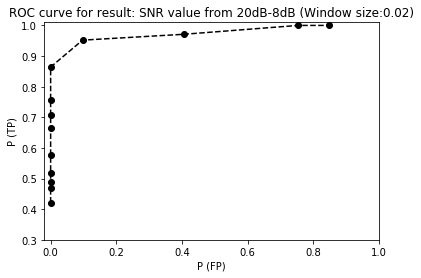

In [110]:
fig, ax = plt.subplots()
ax.plot(z[:,0], z[:,1], 'ko--')
ax.set_xlim([-0.02,1])
ax.set_ylim([0.3,1.01])
ax.set_xlabel("P (FP)")
ax.set_ylabel("P (TP)")
ax.set_title("ROC curve for result: SNR value from 20dB-8dB (Window size:0.02)")

[[0.02777778 0.48739496]
 [0.03846154 0.54621849]
 [0.03409091 0.58823529]
 [0.06       0.66386555]
 [0.17647059 0.87394958]
 [0.72093023 0.97478992]
 [0.88490409 1.        ]]


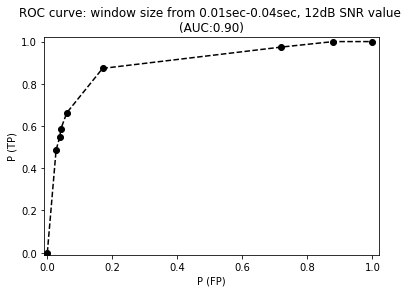

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

target_path = "/home/yong/new_python_work/PAM/algorithm_test/ROCCurve"
for j in range(1,2):
    jj = j*12
    path = "/home/yong/new_python_work/PAM/algorithm_test/result_overlab50_SNR_" + str(round(jj,3))
        
    TPR_list = []
    for i in range(1,8):
        ii = i*0.005+0.005
        filename = path + "/detection_" + str(round(ii,3)) + ".csv" 
        det = pd.read_csv(filename)
        det_ = det
#         det_ = det[(det.iloc[:,1]-det.iloc[:,0])>0.2]
        total_count = det_.iloc[:,2].count()
        TP = det_.iloc[:,2][det_.iloc[:,2]].count()
        TPR_list.append(TP/total_count)
    TPR = np.array(TPR_list)
    
    FPR_list = []
    for i in range(1,8):
        ii = i*0.005+0.005
        filename = path + "/falseAlarm_" + str(round(ii,3)) + ".csv" 
        false = pd.read_csv(filename)
        false_ = false
#         false_ = false[(false.iloc[:,1]-false.iloc[:,0])>0.2]
        total_count = false_.iloc[:,2].count()
        FP = false_.iloc[:,2][false_.iloc[:,2]==False].count()
        FPR_list.append(FP/total_count)
    FPR = np.array(FPR_list)
    
    z = np.concatenate((FPR[::-1,np.newaxis], TPR[::-1,np.newaxis]), axis=1)
    
    fig, ax = plt.subplots()
    ax.plot(a, b, 'ko--')
    ax.set_xlim([-0.01, 1.02])
    ax.set_ylim([-0.01, 1.02])
    ax.set_xlabel("P (FP)")
    ax.set_ylabel("P (TP)")
    title = "ROC curve: window size from 0.01sec-0.04sec, {}dB SNR value \n(AUC:0.90)".format(round(jj,3))
    ax.set_title(title)
    file = target_path + "/ROCCurve_SNR12_window0.2.png"
    print(z)
    plt.savefig(file)

In [86]:
from sklearn.metrics import roc_curve, auc  ###計算roc和auc

In [145]:
a = np.array([0,0.027, 0.038, 0.042, 0.06,0.17,0.72,0.88,1])
b = np.array([0,0.487, 0.546, 0.588, 0.663,0.873,0.974,1,1])
auc(a, b)

0.896108

[[0.02564103 0.55462185]
 [0.03409091 0.61344538]
 [0.05769231 0.66386555]
 [0.13178295 0.75630252]
 [0.5130719  0.92436975]
 [0.85529891 0.98319328]
 [0.88644524 1.        ]]


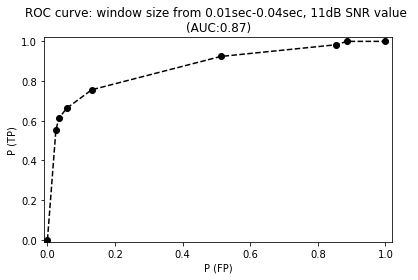

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

target_path = "/home/yong/new_python_work/PAM/algorithm_test/ROCCurve"
for j in range(1,2):
    jj = j*11
    path = "/home/yong/new_python_work/PAM/algorithm_test/result_overlab50_SNR_" + str(round(jj,3))
        
    TPR_list = []
    for i in range(1,8):
        ii = i*0.005+0.005
        filename = path + "/detection_" + str(round(ii,3)) + ".csv" 
        det = pd.read_csv(filename)
        det_ = det
#         det_ = det[(det.iloc[:,1]-det.iloc[:,0])>0.2]
        total_count = det_.iloc[:,2].count()
        TP = det_.iloc[:,2][det_.iloc[:,2]].count()
        TPR_list.append(TP/total_count)
    TPR = np.array(TPR_list)
    
    FPR_list = []
    for i in range(1,8):
        ii = i*0.005+0.005
        filename = path + "/falseAlarm_" + str(round(ii,3)) + ".csv" 
        false = pd.read_csv(filename)
        false_ = false
#         false_ = false[(false.iloc[:,1]-false.iloc[:,0])>0.2]
        total_count = false_.iloc[:,2].count()
        FP = false_.iloc[:,2][false_.iloc[:,2]==False].count()
        FPR_list.append(FP/total_count)
    FPR = np.array(FPR_list)
    
    z = np.concatenate((FPR[::-1,np.newaxis], TPR[::-1,np.newaxis]), axis=1)
    
    fig, ax = plt.subplots()
    ax.plot(a,b ,'ko--')
    ax.set_xlabel("P (FP)")
    ax.set_ylabel("P (TP)")
    ax.set_xlim([-0.01, 1.02])
    ax.set_ylim([-0.01, 1.02])
    title = "ROC curve: window size from 0.01sec-0.04sec, {}dB SNR value \n(AUC:0.87)".format(round(jj,3))
    ax.set_title(title)
    file = target_path + "/ROCCurve_SNR11_window0.2.png"
    print(z)
    plt.tight_layout()
    plt.savefig(file)

In [151]:
a = np.array([0,0.025, 0.034,0.057, 0.131, 0.513, 0.855,0.886,1])
b = np.array([0,0.554, 0.613, 0.663, 0.756,0.924,0.983,1,1])
auc(a, b)

0.871067

[[0.03125    0.41176471]
 [0.02941176 0.45378151]
 [0.03896104 0.5210084 ]
 [0.03409091 0.57983193]
 [0.08108108 0.73109244]
 [0.49462366 0.91596639]
 [0.85704561 0.97478992]]


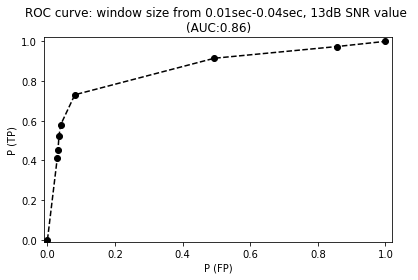

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

target_path = "/home/yong/new_python_work/PAM/algorithm_test/ROCCurve"
for j in range(1,2):
    jj = j*13
    path = "/home/yong/new_python_work/PAM/algorithm_test/result_overlab50_SNR_" + str(round(jj,3))
        
    TPR_list = []
    for i in range(1,8):
        ii = i*0.005+0.005
        filename = path + "/detection_" + str(round(ii,3)) + ".csv" 
        det = pd.read_csv(filename)
        det_ = det
#         det_ = det[(det.iloc[:,1]-det.iloc[:,0])>0.2]
        total_count = det_.iloc[:,2].count()
        TP = det_.iloc[:,2][det_.iloc[:,2]].count()
        TPR_list.append(TP/total_count)
    TPR = np.array(TPR_list)
    
    FPR_list = []
    for i in range(1,8):
        ii = i*0.005+0.005
        filename = path + "/falseAlarm_" + str(round(ii,3)) + ".csv" 
        false = pd.read_csv(filename)
        false_ = false
#         false_ = false[(false.iloc[:,1]-false.iloc[:,0])>0.2]
        total_count = false_.iloc[:,2].count()
        FP = false_.iloc[:,2][false_.iloc[:,2]==False].count()
        FPR_list.append(FP/total_count)
    FPR = np.array(FPR_list)
    
    z = np.concatenate((FPR[::-1,np.newaxis], TPR[::-1,np.newaxis]), axis=1)
    
    fig, ax = plt.subplots()
    ax.plot(a,b ,'ko--')
#     ax.plot(z[:,0], z[:,1], 'ko--')
    ax.set_xlabel("P (FP)")
    ax.set_ylabel("P (TP)")
    ax.set_xlim([-0.01, 1.02])
    ax.set_ylim([-0.01, 1.02])
    title = "ROC curve: window size from 0.01sec-0.04sec, {}dB SNR value \n(AUC:0.86)".format(round(jj,3))
    ax.set_title(title)
    file = target_path + "/ROCCurve_SNR13_window0.2.png"
    print(z)
    plt.tight_layout()
    plt.savefig(file)

In [157]:
a = np.array([0,0.029, 0.03125,0.0340, 0.0389, 0.081, 0.494,0.857,1])
b = np.array([0,0.411, 0.453, 0.521, 0.579,0.731,0.915,0.974,1])
auc(a, b)

0.86243475

[[0.         0.27419355]
 [0.         0.51612903]
 [0.03883495 0.56451613]
 [0.14285714 0.65322581]
 [0.15686275 0.83870968]
 [0.22962963 0.68      ]
 [0.66287016 0.86507937]
 [0.63841808 0.752     ]
 [0.64247312 0.81746032]]


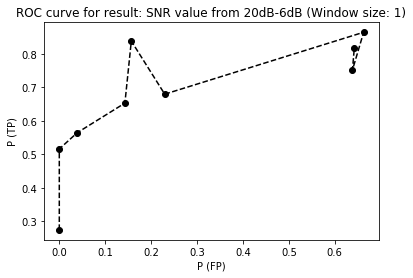

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

target_path = "/home/yong/new_python_work/PAM/algorithm_test/ROCCurve"
for j in range(1,2):
    jj = j*12
    path = "/home/yong/new_python_work/PAM/algorithm_test/result_overlab50_SNR_" + str(round(jj,3)) + "_window_0.02"
        
    TPR_list = []
    for i in range(1,10):
        ii = i*0.1
        filename = path + "/detection_" + str(round(ii,3)) + ".csv" 
        det = pd.read_csv(filename)
        det_ = det
#         det_ = det[(det.iloc[:,1]-det.iloc[:,0])>0.2]
        total_count = det_.iloc[:,2].count()
        TP = det_.iloc[:,2][det_.iloc[:,2]].count()
        TPR_list.append(TP/total_count)
    TPR = np.array(TPR_list)
    
    FPR_list = []
    for i in range(1,10):
        ii = i*0.1
        filename = path + "/falseAlarm_" + str(round(ii,3)) + ".csv" 
        false = pd.read_csv(filename)
        false_ = false
#         false_ = false[(false.iloc[:,1]-false.iloc[:,0])>0.2]
        total_count = false_.iloc[:,2].count()
        FP = false_.iloc[:,2][false_.iloc[:,2]==False].count()
        FPR_list.append(FP/total_count)
    FPR = np.array(FPR_list)
    
    z = np.concatenate((FPR[::-1,np.newaxis], TPR[::-1,np.newaxis]), axis=1)
    
    fig, ax = plt.subplots()
    ax.plot(z[:,0], z[:,1], 'ko--')
#     ax.set_xlim([-0.02,1])
#     ax.set_ylim([0.2,1.01])
    ax.set_xlabel("P (FP)")
    ax.set_ylabel("P (TP)")
    title = "ROC curve for result: SNR value from 20dB-6dB (Window size: {})".format(round(j,3))
    ax.set_title(title)
    file = target_path + "/ROCCurve_1_" + str(round(jj,3)) + ".png"
    print(z)
#     plt.savefig(file)